<a href="https://colab.research.google.com/github/biozid-0208/daily-random-programming-commit/blob/main/shortestPath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import networkx as nx

edges = [(1,2, {'weight':4}),
        (1,3,{'weight':2}),
        (2,3,{'weight':1}),
        (2,4, {'weight':5}),
        (3,4, {'weight':8}),
        (3,5, {'weight':10}),
        (4,5,{'weight':2}),
        (4,6,{'weight':8}),
        (5,6,{'weight':5})]
edge_labels = {(1,2):4, (1,3):2, (2,3):1, (2,4):5, (3,4):8, (3,5):10, (4,5):2, (4,6):8, (5,6):5}
   
        
G = nx.Graph()
for i in range(1,7):
    G.add_node(i)
G.add_edges_from(edges)

pos = nx.planar_layout(G)

# This will give us all the shortest paths from node 1 using the weights from the edges. 
p1 = nx.shortest_path(G, source=1, weight='weight')

# This will give us the shortest path from node 1 to node 6.
p1to6 = nx.shortest_path(G, source=1, target=6, weight='weight')

# This will give us the length of the shortest path from node 1 to node 6.
length = nx.shortest_path_length(G, source=1, target=6, weight='weight')


print( p1to6)


{1: [1], 2: [1, 3, 2], 3: [1, 3], 4: [1, 3, 2, 4], 5: [1, 3, 2, 4, 5], 6: [1, 3, 2, 4, 5, 6]}
[1, 3, 2, 4, 5, 6]
15


{(1, 2): Text(-0.896006679078851, -0.387097812422664, '4'),
 (1, 3): Text(-0.41495832497919716, -0.5451667359880856, '2'),
 (2, 3): Text(-0.3109650040580482, -0.14154958470401827, '1'),
 (2, 4): Text(-0.35613495909316983, 0.19257716467090408, '5'),
 (3, 4): Text(0.12491339500648403, 0.03450824110548242, '8'),
 (3, 5): Text(0.48370682885872135, -0.1678946237752546, '10'),
 (4, 5): Text(0.43853687382359974, 0.16623212559966774, '2'),
 (4, 6): Text(0.41229985022012916, 0.5549924361979183, '8'),
 (5, 6): Text(0.7710932840723665, 0.3525895713171812, '5')}

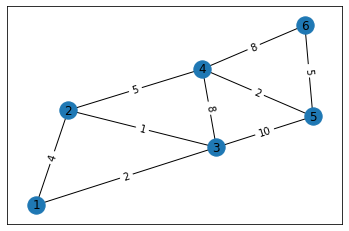

In [16]:
import matplotlib.pyplot as plt
pos=nx.spring_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [19]:
a = []
for j in range(0,len(p1to6)-1):
    a.append((p1to6[j], p1to6[j+1]))
print(a)


[(1, 3), (3, 2), (2, 4), (4, 5), (5, 6)]


In [22]:
p1to5 = nx.shortest_path(G, source=1, target=5, weight='weight')
p1to5

[1, 3, 2, 4, 5]

In [23]:
b = []
for j in range(0,len(p1to5)-1):
    b.append((p1to5[j], p1to5[j+1]))
print(b)

[(1, 3), (3, 2), (2, 4), (4, 5)]


In [35]:
def detectOverlap(a, b):
  for i in a:
    for j in b:
      if set(i) == set(j):
        return 1
  return 0

In [39]:
d = {"r1": [(1, 3), (3, 2), (2, 4), (4, 5)],
"r2" : [(1, 3), (3, 2), (2, 4), (4, 5), (5, 6)],
"r3": [(5,3)]}

In [40]:

arr = []
for k1 in d.keys() :
  tem = []
  for k2 in d.keys():
    if k1 == k2:
      result = 0
    else:
      result = detectOverlap(d[k1], d[k2])
    tem.append(result)
  arr.append(tem)
arr

[[0, 1, 0], [1, 0, 0], [0, 0, 0]]

In [38]:
import numpy as np
a = np.array(arr)
a

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0]])

In [41]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

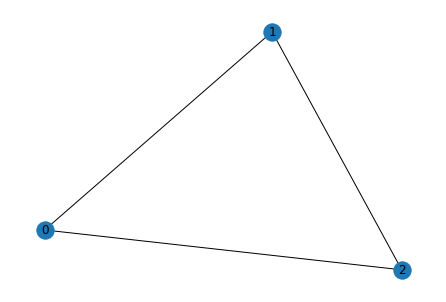

In [48]:
G = nx.from_numpy_matrix(a)
nx.draw(G, with_labels=True)
plt.show()

In [49]:
colors = [
"lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold", "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal", "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"]

In [50]:
import random
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes()) 
    random.shuffle(nodes) # step 1 random ordering
    for node in nodes:
        dict_neighbors = dict(network[node])
# gives names of nodes that are neighbors
        nodes_neighbors = list(dict_neighbors.keys())
        
        forbidden_colors = []
        for neighbor in nodes_neighbors:
            if len(network.nodes.data()[neighbor].keys()) == 0: 
                # if the neighbor has no color, proceed
                continue
            else:
                # if the neighbor has a color,
                # this color is forbidden
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']
                forbidden_colors.append(forbidden_color)
        # assign the first color 
        # that is not forbidden
        for color in colors:
            # step 2: start everytime at the top of the colors,
            # so that the smallest number of colors is used
            if color in forbidden_colors:
                continue
            else:
                # step 3: color one node at the time
                network.nodes[node]['color'] = color
                break

In [51]:
greedy_coloring_algorithm(G, colors)

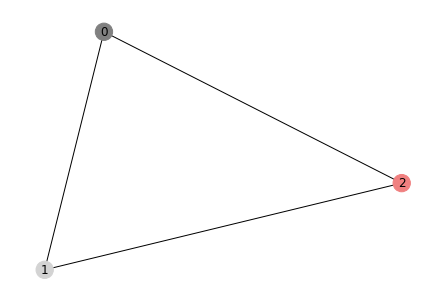

In [52]:
colors_nodes = [data['color'] for v, data in G.nodes(data=True)]
nx.draw(G, node_color=colors_nodes, with_labels=True)

In [53]:
colors_nodes

['gray', 'lightgray', 'lightcoral']